In [1]:
import sys
sys.path.append("../model/clustering/")
sys.path.append("../utils/")

import cv2
import numpy as np

import matplotlib.pyplot as plt

#from gaussian_mixture_model import GMM

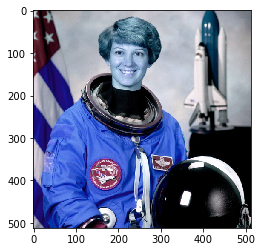

In [22]:
# Load sample image
imsample_astronaut = cv2.imread("../asset/astronaut.png").astype(np.uint8)

plt.imshow(imsample_astronaut)

[2.41970725e-002 2.66085250e-002 2.89691553e-002 3.12253933e-002
 3.33224603e-002 3.52065327e-002 3.68270140e-002 3.81387815e-002
 3.91042694e-002 3.96952547e-002 3.98942280e-002 3.96952547e-002
 3.91042694e-002 3.81387815e-002 3.68270140e-002 3.52065327e-002
 3.33224603e-002 3.12253933e-002 2.89691553e-002 2.66085250e-002
 2.41970725e-002 2.17852177e-002 1.94186055e-002 1.71368592e-002
 1.49727466e-002 1.29517596e-002 1.10920835e-002 9.40490774e-003
 7.89501583e-003 6.56158148e-003 5.39909665e-003 4.39835960e-003
 3.54745928e-003 2.83270377e-003 2.23945303e-003 1.75283005e-003
 1.35829692e-003 1.04209348e-003 7.91545158e-004 5.95253242e-004
 4.43184841e-004 3.26681906e-004 2.38408820e-004 1.72256894e-004
 1.23221917e-004 8.72682695e-005 6.11901930e-005 4.24780271e-005
 2.91946926e-005 1.98655471e-005 1.33830226e-005 8.92616572e-006
 5.89430678e-006 3.85351967e-006 2.49424713e-006 1.59837411e-006
 1.01408521e-006 6.36982518e-007 3.96129909e-007 2.43896075e-007
 1.48671951e-007 8.972435

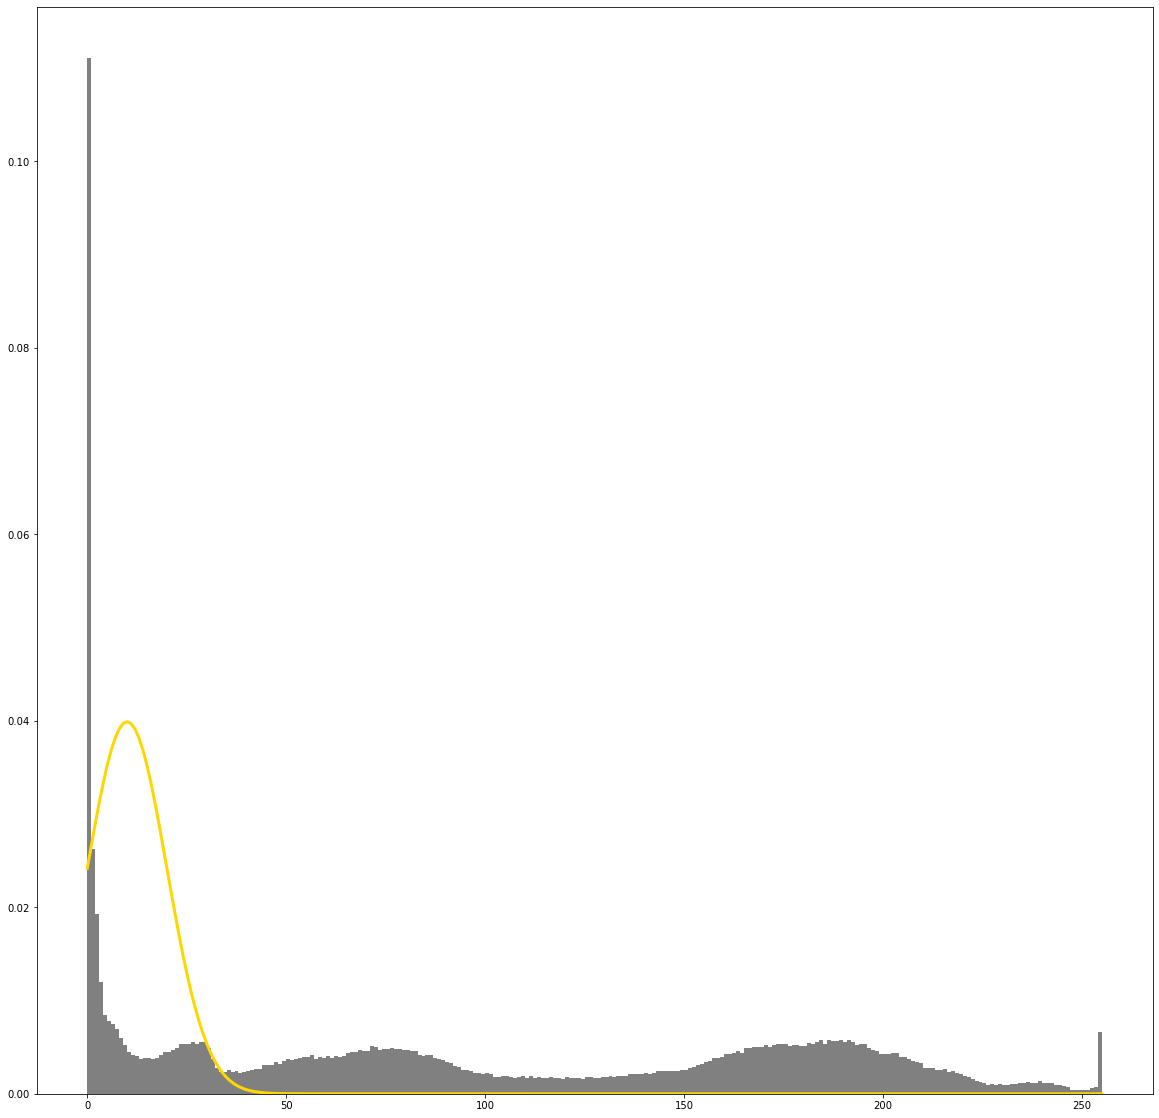

In [23]:
## Snake model

# Add seed points
seed = np.zeros_like(imsample_astronaut[..., 0])

# Define model
# model = GMM()

# Run
# region = model.run()

# Plot
def funcGaussian(x, theta):
    return (np.exp(-.5*(x - theta[0])**2./theta[1]**2.)
            / np.sqrt(2.*np.pi*theta[1]**2.) )

def drawHistogram(x, thetas, prior):
    # Define plot components 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

    # Vectorize input
    vec = x.astype(np.uint8).ravel()
    vrange = (vec.min(), vec.max())

    # Get histogram bins
    bins = np.linspace(vrange[0], vrange[1], vrange[1]-vrange[0]+1)

    # Plot histogram
    axes.hist(vec, vrange[1], vrange, density=True, color="gray")
    
    # Build Gaussian mixture
    mixedDist = np.zeros_like(bins)
    for n in range(len(prior)):
        print(funcGaussian(bins, thetas[n]))
        print(prior[n])
        print(mixedDist)
        mixedDist += prior[n]*funcGaussian(bins, thetas[n])

    # Plot Gaussian mixture
    axes.plot(bins, mixedDist, color="gold", linewidth=3)

    plt.show()

def drawGMM(x):
    return 0

drawHistogram(imsample_astronaut[..., 0], thetas, prior)

